---
# Estudos Avançados de Bancos de Dados
### **Pontifícia Universidade Católica de Campinas**
### **Prof. Dr. Denis Mayr Lima Martins**
---

# Contexto histórico - Perspectiva Computacional

- No passado: Sistemas Gerenciadores de Bancos de Dados (SGBD, ou DBMS do inglês) eram a ferramenta de primordial de análise de dados.
    - ~50 anos de pesquisa, ~500.000 transações/segundo, algoritmos muito eficientes.
    - SQL, modelo relacional, data warehouse...

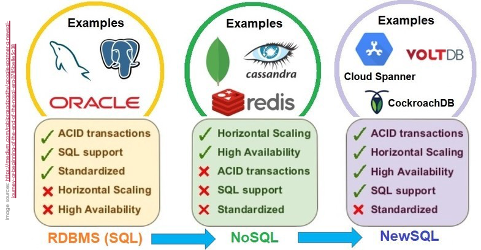


- No presente: análise de dados realizada *fora* do SGBD.
    - Arquivos CSV, Python, R, Spark, data lake...
    - O landscape de ferramentas disponíveis é gigantesco.

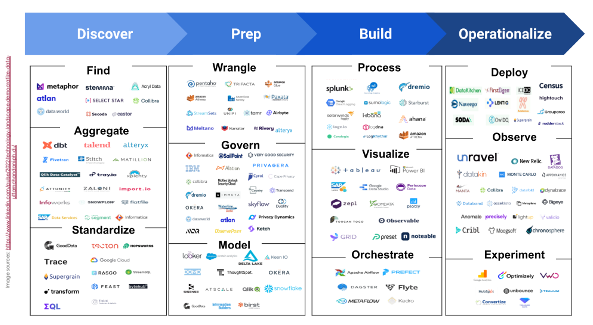

- Considerações gerais:
    - Aplicações de ML são altamente impactadas pela qualidade e quantidade de dados.
    - Acesso aos dados se torna o gargalo do sistema (i.e., mover dados é muito custoso) -> Mova a análise e não os dados (e.g., MapReduce, Spark, etc).



# Introdução à Estatística Descritiva

## Objetivos de Aprendizagem

- Entender os conceitos básicos de estatística descritiva.
- Aprender a calcular medidas estatísticas com Python.
- Compreender o uso de visualizações para interpretar dados.

## Definição

A estatística descritiva é um ramo da estatística que analisa e resume um conjunto de dados através de medidas numéricas e visualizações (gráficos).

##  Principais Componentes

- Medidas de Tendência Central: Média, Mediana e Moda.
- Medidas de Dispersão: Desvio Padrão, Variância, Amplitude.
- Distribuição dos Dados: Histogramas, Boxplots.

## Processo Padronizado: CRISP-DM

O CRISP-DM (Cross Industry Standard Process for Data Mining) é uma [metodologia](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) amplamente utilizada para projetos de ciência de dados e mineração de dados. Ele define um processo estruturado para transformar dados brutos em conhecimento útil.

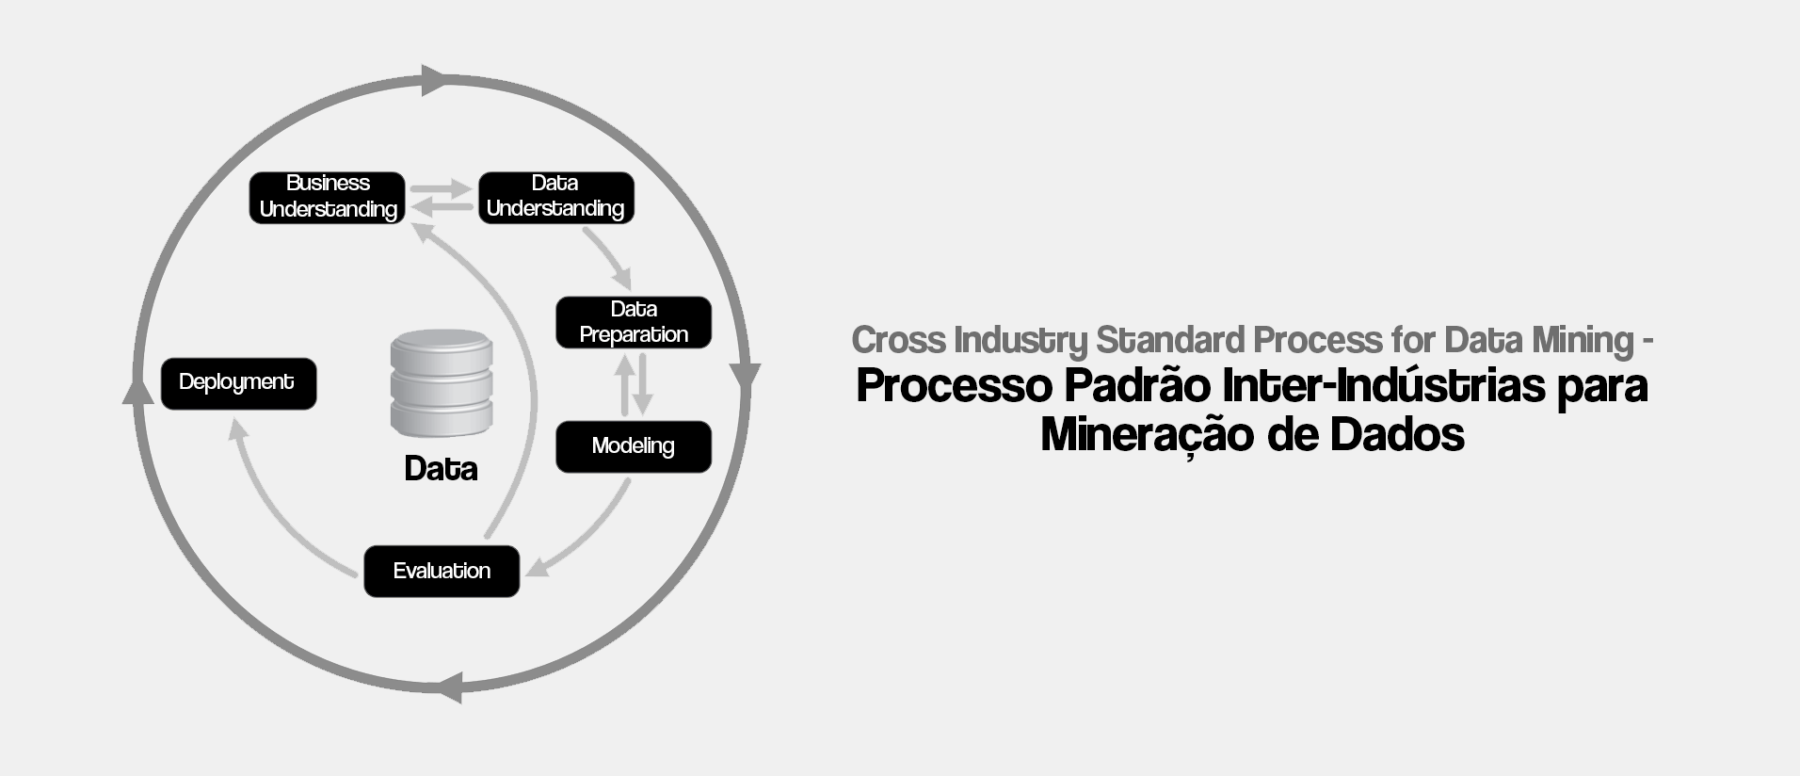

- Passo 1. Compreensão do Negócio: Definir o problema e os objetivos do negócio.
- Passo 2. Compreensão dos Dados: Coletar, explorar e avaliar a qualidade dos dados.
- Passo 3. Preparação dos Dados: Limpar, transformar e estruturar os dados para análise.
- Passo 4. Modelagem: Aplicar técnicas estatísticas, de inteligência artificial e/ou machine learning para encontrar padrões.
- Passo 5: Validar modelo e algoritmos, interpretar resultados e verificar se atendem ao objetivo do negócio.
- Passo 6: Implementar o modelo para ser usado no ambiente real e monitorar seu desempenho.

## Data Understanding e Estatística Descritiva

A **Compreensão e Preparação dos Dados**, etapas iniciais do **CRISP-DM**, estão diretamente ligadas à **Estatística Descritiva**, pois antes de qualquer modelagem ou análise avançada, é essencial explorar, resumir e entender as características dos dados. 

- **Compreensão dos Dados** envolve a identificação de padrões, verificação da distribuição das variáveis, detecção de valores ausentes e identificação de outliers, utilizando técnicas como **média, mediana, desvio padrão e histogramas**. 
- **Preparação dos Dados** inclui a limpeza, transformação e normalização dos dados para garantir sua qualidade e adequação à modelagem, onde métodos estatísticos ajudam a corrigir inconsistências, remover ruído e estruturar os dados de forma eficiente. 

Dessa forma, a estatística descritiva é fundamental para garantir que os dados sejam confiáveis e representativos antes de aplicar qualquer técnica de aprendizado de máquina ou modelagem preditiva. 

- Compreensão e Preparação dos Dados usam estatística descritiva para analisar padrões iniciais.
- Visualização de dados ajuda a entender melhor o contexto antes da modelagem.

## Exemplo de Estatística Descritiva em Python

Vamos aplicar estatística descritiva em um conjuto de dados simples para fins de exemplo.


### Carregando os dados

In [ ]:
import pandas as pd
import random

# Para reproducibilidade
random.seed(1234) 

NUM_ALUNOS = 30

# Criando um DataFrame com notas de alunos
dados = {
    "Aluno": [f"Aluno_{i}" for i in range(NUM_ALUNOS)],
    "Nota": [random.randint(5, 10) - random.randint(1, 2)/2 
                for i in range(NUM_ALUNOS)]
}

df = pd.DataFrame(dados)
print(df)

### Medidas de tendência central

Média, Mediana e Moda são medidas de tendência central, que ajudam a descrever o comportamento de um conjunto de dados.

- Média: Soma dos valores dividida pelo total de elementos. Influenciada por valores extremos.
- Mediana: Valor central da distribuição. A mediana consegue filtrar valores extremos.
- Moda: Valor mais frequente no conjunto de dados. Útil para para variáveis qualitativas (e.g., sim, não).



In [ ]:
media = df["Nota"].mean()
print(media)

In [ ]:
mediana = df["Nota"].median()
print(mediana)

In [ ]:
moda = df["Nota"].mode()
moda

### Medidas de Dispersão

- Variância: Mede a dispersão dos dados em relação à média.
- Desvio Padrão: Raiz quadrada da variância, indica o quanto os valores variam da média.

In [ ]:
variancia = df["Nota"].var()
desvio_padrao = df["Nota"].std()

print(f"Variância: {variancia}, Desvio Padrão: {desvio_padrao}")

### Quartis e Intervalo Interquartil (IQR)

- Quartis: Dividem os dados em 4 partes iguais. Permitem entender a distribuição dos dados, identificando se os valores estão concentrados ou espalhados.
    - `|---- Q1 ----|---- Q2 (Mediana) ----|---- Q3 ----|`
    - 1º Quartil (Q1 - 25%) → 25% dos valores estão abaixo deste ponto.
    - 2º Quartil (Q2 - 50%) → Mediana, que divide os dados ao meio.
    - 3º Quartil (Q3 - 75%) → 75% dos valores estão abaixo deste ponto.
- IQR (Intervalo Interquartil): Mede a dispersão entre o 1º e o 3º quartil. $IQR=Q3−Q1$
    - Mede a variação dos dados ignorando extremos, tornando-se mais robusto que o desvio padrão.
    - Ajuda a identificar outliers, pois valores muito abaixo de $Q1 - 1.5 × IQR$ ou muito acima de $Q3 + 1.5 × IQR$ são frequentemente considerados outliers.

In [ ]:
quartis = df["Nota"].quantile([0.25, 0.5, 0.75])
iqr = quartis[0.75] - quartis[0.25]

print(f"Quartis:\n{quartis}")
print(f"IQR: {iqr}")

In [ ]:
# Cálculo dos quartis
Q1 = df["Nota"].quantile(0.25)
Q2 = df["Nota"].quantile(0.50)  # Mediana
Q3 = df["Nota"].quantile(0.75)
IQR = Q3 - Q1

# Definição de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificação de outliers
outliers = df[(df["Nota"] < limite_inferior) | (df["Nota"] > limite_superior)]

print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, IQR: {IQR}")
print(f"Outliers: {outliers['Nota'].tolist()}")


## Visualização com Histogramas

Os **histogramas** são gráficos de barras que representam a **distribuição de frequência** de um conjunto de dados numéricos. Eles são amplamente utilizados na **estatística descritiva** para visualizar como os valores estão distribuídos ao longo de um intervalo. Os histogramas agrupam os dados em **bins (intervalos)** e mostram quantos valores caem dentro de cada intervalo. Isso permite identificar **padrões importantes**, como **assimetrias, concentração de valores e presença de outliers**. 

Ao analisar um histograma, podemos responder a perguntas como: *Os dados estão bem distribuídos? Há um viés para um lado? Existem picos inesperados?*. Esse tipo de análise ajuda a compreender melhor os dados antes de aplicar modelos estatísticos mais avançados.



In [ ]:
import matplotlib.pyplot as plt

df["Nota"].hist(bins=5, edgecolor="black")
plt.xlabel("Notas")
plt.ylabel("Frequência")
plt.title("Distribuição de Notas")
plt.show()

### Boxplot

O boxplot é uma ferramenta visual da estatística descritiva usada para resumir a distribuição dos dados e identificar outliers. Ele exibe cinco estatísticas principais: mínimo, primeiro quartil (Q1), mediana (Q2), terceiro quartil (Q3) e máximo. A caixa representa o intervalo interquartil (IQR = Q3 - Q1), enquanto os "bigodes" mostram a dispersão dos dados dentro de um limite aceitável. Valores que estão muito além desses limites são considerados outliers e são exibidos como pontos individuais. O boxplot é amplamente utilizado para comparar distribuições, detectar assimetrias e identificar variações nos dados de maneira rápida e intuitiva.

In [ ]:
df.boxplot(column="Nota")
plt.title("Boxplot das Notas")
plt.show()

## A Importância da Visualização de Dados

A visualização de dados é essencial na **análise estatística e na tomada de decisões**, pois permite identificar padrões, tendências e anomalias que podem não ser evidentes apenas com estatísticas descritivas. O **[Quarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe's_quartet)** é um exemplo clássico que destaca essa importância: apesar de seus quatro conjuntos de dados possuírem **médias, variâncias e correlações idênticas**, a visualização revela que cada conjunto tem um comportamento completamente diferente. Enquanto um conjunto exibe uma relação linear clara, outro contém um **outlier extremo** que influencia a regressão, e um terceiro forma uma **distribuição não linear**. Esse exemplo ilustra que confiar exclusivamente em estatísticas pode levar a **interpretações errôneas**, enquanto gráficos como **scatter plots, histogramas e boxplots** fornecem um entendimento mais profundo da estrutura dos dados. Assim, combinar estatísticas descritivas com visualizações é fundamental para uma análise precisa e confiável.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Dados do Anscombe's quartet
anscombe = {
    "I": {
        "x": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    "II": {
        "x": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y": [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    "III": {
        "x": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    "IV": {
        "x": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        "y": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

# Criando um DataFrame para armazenar as estatísticas
estatisticas = pd.DataFrame(columns=[
    "Média X", "Média Y", "Variância X", 
    "Variância Y", "Correlação XY", "Coef Angular (Regressão)"
])

# Criando a estrutura 2x2 para os gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Anscombe’s Quartet - Comparação Visual", fontsize=14)

# Mapeando os títulos para os gráficos
titulos = ["I", "II", "III", "IV"]

# Calculando métricas estatísticas e plotando os gráficos
for i, key in enumerate(anscombe):
    x = np.array(anscombe[key]["x"])
    y = np.array(anscombe[key]["y"])
    
    # Coeficientes da regressão linear (y = ax + b)
    coef_angular, intercept = np.polyfit(x, y, 1)
    
    # Salvando estatísticas no DataFrame
    estatisticas.loc[key] = [
        np.mean(x),          # Média de X
        np.mean(y),          # Média de Y
        np.var(x, ddof=1),   # Variância de X
        np.var(y, ddof=1),   # Variância de Y
        stats.pearsonr(x, y)[0],  # Correlação de Pearson entre X e Y
        coef_angular         # Coeficiente angular (inclinação da reta de regressão)
    ]
    
    # Determinando a posição do gráfico
    ax = axes[i//2, i%2]
    ax.scatter(x, y, color='blue', label='Pontos de dados')
    
    ax.plot(
        x, 
        coef_angular * x + intercept, 
        color='red', 
        linestyle="--", 
        label="Regressão Linear"
    )
    
    ax.set_title(f"Dataset {titulos[i]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()

# Ajustando layout e exibindo os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

estatisticas